In [1]:
%matplotlib inline
import PIL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

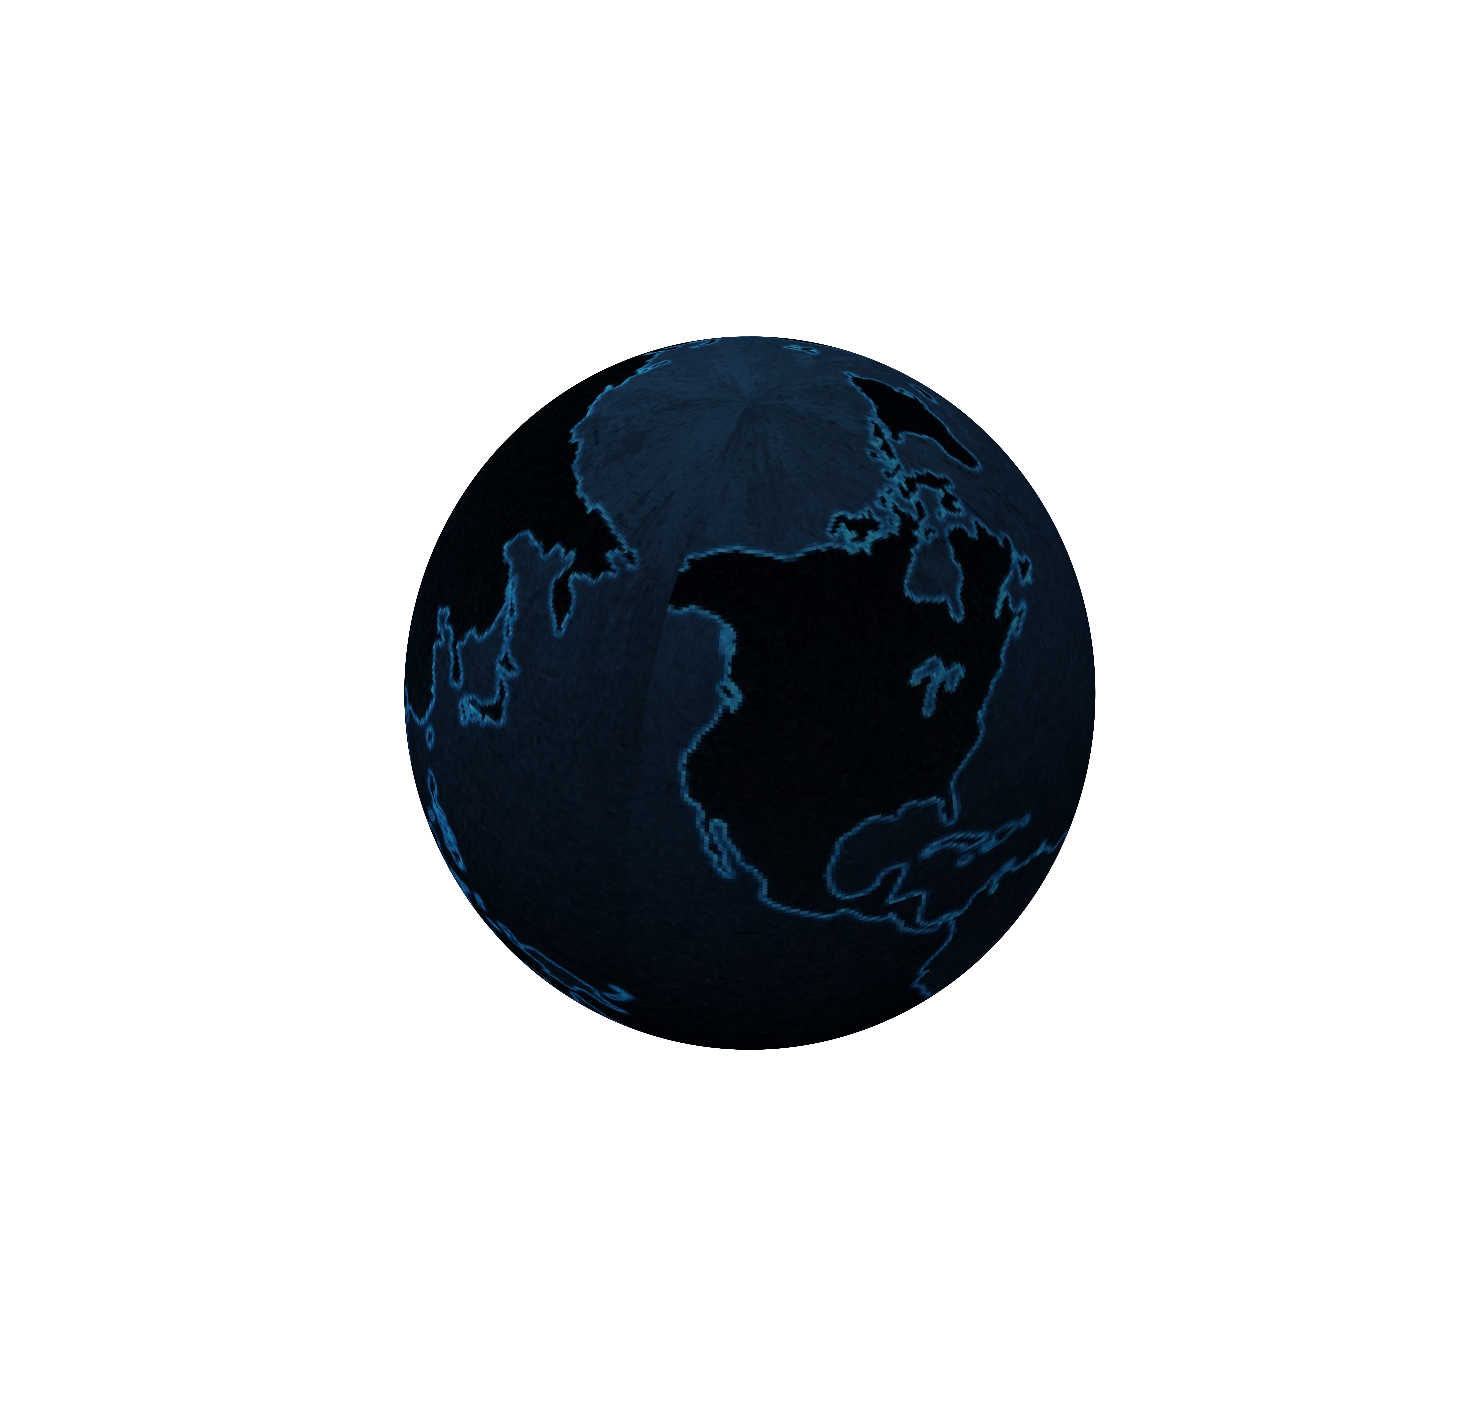

In [4]:
# load bluemarble with PIL
bm = PIL.Image.open('world_cool.jpg')
# it's big, so I'll rescale it, convert to array, and divide by 256 to get RGB values that matplotlib accept 
bm = np.array(bm.resize([d // 2 for d in bm.size])) / 256.

# coordinates of the image - don't know if this is entirely accurate, but probably close
lons = np.linspace(-180, 180, bm.shape[1]) * np.pi/180 
lats = np.linspace(-90, 90, bm.shape[0])[::-1] * np.pi/180 

# repeat code from one of the examples linked to in the question, except for specifying facecolors:
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')

R = 0.5

x = R * np.outer(np.cos(lons), np.cos(lats)).T
y = R * np.outer(np.sin(lons), np.cos(lats)).T
z = R * np.outer(np.ones(np.size(lons)), np.sin(lats)).T
ax.plot_surface(x, y, z, rstride=2, cstride=2, facecolors = bm, zorder=-1, alpha=0.9)

ax.view_init(elev=40, azim=-160)
ax.set_axis_off()
fig.savefig("map_clusters.png", bbox_inches="tight", transparent=True, dpi=200)
